## Домашнее задание

1. *Самостоятельно повторить tfidf (документация https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
2. Модифицировать код функции get_user_embedding таким образом, чтобы считалось не среднее (как в примере np.mean), а медиана. Применить такое преобразование к данным, обучить модель прогнозирования оттока и посчитать метрики качества и сохранить их: roc auc, precision/recall/f_score (для 3 последних - подобрать оптимальный порог)
3. Повторить п.2, но используя уже не медиану, а max
4. *Воспользовавшись полученными знаниями из п.1, повторить пункт 2, но уже взвешивая новости по tfidf (взяв список новостей пользователя)
    - подсказка 1: нужно получить веса-коэффициенты для каждого документа. Не все документы одинаково информативны и несут какой-то положительный сигнал
    - подсказка 2: нужен именно idf, как вес.
5. Сформировать на выходе единую таблицу, сравнивающую качество 2/3 разных метода получения эмбедингов пользователей: median, max, idf_mean по метрикам roc_auc, precision, recall, f_score
6. Сделать самостоятельные выводы и предположения о том, почему тот или ной способ оказался эффективнее остальных

In [ ]:
import pandas as pd

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR" -O articles.csv && rm -rf /tmp/cookies.txt

--2023-06-22 11:18:42--  https://docs.google.com/uc?export=download&confirm=t&id=1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR
Resolving docs.google.com (docs.google.com)... 172.253.62.101, 172.253.62.102, 172.253.62.138, ...
Connecting to docs.google.com (docs.google.com)|172.253.62.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ush3knlut1qduv08ueo2l8rhl4ona6li/1687432650000/14904333240138417226/*/1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR?e=download&uuid=faa67f56-8f28-407a-8b83-06e2cd446ba7 [following]
--2023-06-22 11:18:42--  https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ush3knlut1qduv08ueo2l8rhl4ona6li/1687432650000/14904333240138417226/*/1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR?e=download&uuid=faa67f56-8f28-407a-8b83-06e2cd446ba7
Resolving doc-0s-c0-docs.googleusercontent.com (doc-0s-c0-docs.googleusercontent.com)... 172.253.62.132, 

In [ ]:
news = pd.read_csv("articles.csv")
print(news.shape)
news.head(3)

(27000, 2)


,doc_id,title
0,6,Заместитель председателяnправительства РФnСерг...
1,4896,Матч 1/16 финала Кубка России по футболу был п...
2,4897,Форвард «Авангарда» Томаш Заборский прокоммент...


In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1Q97K9eGrvpbS4ut5CphZa--gJDRqQp2a' -O users_articles.csv

--2023-06-22 11:19:55--  https://drive.google.com/uc?export=download&id=1Q97K9eGrvpbS4ut5CphZa--gJDRqQp2a
Resolving drive.google.com (drive.google.com)... 142.251.167.113, 142.251.167.100, 142.251.167.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.167.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j6o1fmg2j683m29nj287akigahfffqcf/1687432725000/14904333240138417226/*/1Q97K9eGrvpbS4ut5CphZa--gJDRqQp2a?e=download&uuid=eb24dc8c-4386-4a16-8990-711d58fcb38a [following]
--2023-06-22 11:19:55--  https://doc-04-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j6o1fmg2j683m29nj287akigahfffqcf/1687432725000/14904333240138417226/*/1Q97K9eGrvpbS4ut5CphZa--gJDRqQp2a?e=download&uuid=eb24dc8c-4386-4a16-8990-711d58fcb38a
Resolving doc-04-c0-docs.googleusercontent.com (doc-04-c0-docs.googleusercontent.com)... 172.253.62.132, 2

In [ ]:
# пользователи и списки последних прочитанных новостей
users = pd.read_csv("users_articles.csv")
users.head(5)

,uid,articles
0,u105138,"[293672, 293328, 293001, 293622, 293126, 1852]"
1,u108690,"[3405, 1739, 2972, 1158, 1599, 322665]"
2,u108339,"[1845, 2009, 2356, 1424, 2939, 323389]"
3,u101138,"[5933, 6186, 5055, 6977, 5206, 488389]"
4,u108248,"[707, 1144, 2532, 2928, 3133, 324592]"


In [ ]:
! pip install razdel pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 123.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=dc56a2d8f56473e0463f30540d565527977d55c807eaaa444f62c1e0bec73ef0
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
# предобработка текстов
import re
import numpy as np
from gensim.corpora.dictionary import Dictionary
from razdel import tokenize  # сегментация русскоязычного текста на токены и предложения https://github.com/natasha/razdel
import pymorphy2  # Морфологический анализатор
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=17wVn5YPpMjHToctGgff_KfSeWcIIlf7c' -O stopwords.txt

--2023-06-22 11:24:11--  https://drive.google.com/uc?export=download&id=17wVn5YPpMjHToctGgff_KfSeWcIIlf7c
Resolving drive.google.com (drive.google.com)... 142.251.167.113, 142.251.167.139, 142.251.167.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.167.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mnuf2pn4pkn569b7krmnnrkb60ukdetd/1687433025000/14904333240138417226/*/17wVn5YPpMjHToctGgff_KfSeWcIIlf7c?e=download&uuid=de422dff-65bd-4bb2-8a0f-3add645b1487 [following]
--2023-06-22 11:24:11--  https://doc-0s-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mnuf2pn4pkn569b7krmnnrkb60ukdetd/1687433025000/14904333240138417226/*/17wVn5YPpMjHToctGgff_KfSeWcIIlf7c?e=download&uuid=de422dff-65bd-4bb2-8a0f-3add645b1487
Resolving doc-0s-c0-docs.googleusercontent.com (doc-0s-c0-docs.googleusercontent.com)... 172.253.62.132, 2

In [ ]:
stopword_ru = stopwords.words('russian')
with open('stopwords.txt') as f:
    additional_stopwords = [w.strip() for w in f.readlines() if w]

stopword_ru += additional_stopwords

In [ ]:
def clean_text(text):
    '''
    очистка текста

    на выходе очищеный текст
    '''
    if not isinstance(text, str):
        text = str(text)

    text = text.lower()
    text = text.strip('\n').strip('\r').strip('\t')
    text = re.sub("-\s\r\n\|-\s\r\n|\r\n", '', str(text))

    text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•·&()]|[+=]|[[]|[]]|[/]|", '', text)
    text = re.sub(r"\r\n\t|\n|\\s|\r\t|\\n", ' ', text)
    text = re.sub(r'[\xad]|[\s+]', ' ', text.strip())
    text = re.sub('n', ' ', text)

    return text

cache = {}
morph = pymorphy2.MorphAnalyzer()

def lemmatization(text):
    '''
    лемматизация
        [0] если зашел тип не `str` делаем его `str`
        [1] токенизация предложения через razdel
        [2] проверка есть ли в начале слова '-'
        [3] проверка токена с одного символа
        [4] проверка есть ли данное слово в кэше
        [5] лемматизация слова
        [6] проверка на стоп-слова

    на выходе лист лемматизированых токенов
    '''

    # [0]
    if not isinstance(text, str):
        text = str(text)

    # [1]
    tokens = list(tokenize(text))
    words = [_.text for _ in tokens]

    words_lem = []
    for w in words:
        if w[0] == '-': # [2]
            w = w[1:]
        if len(w) > 1: # [3]
            if w in cache: # [4]
                words_lem.append(cache[w])
            else: # [5]
                temp_cach = cache[w] = morph.parse(w)[0].normal_form
                words_lem.append(temp_cach)

    words_lem_without_stopwords = [i for i in words_lem if not i in stopword_ru] # [6]

    return words_lem_without_stopwords

In [ ]:
from tqdm import tqdm
tqdm.pandas()

# Очистка текста.
news['title'] = news['title'].progress_apply(lambda x: clean_text(x))

  0%|          | 0/27000 [00:00<?, ?it/s]<ipython-input-10-9f6154e12c19>:14: FutureWarning: Possible nested set at position 39
  text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•·&()]|[+=]|[[]|[]]|[/]|", '', text)
100%|██████████| 27000/27000 [00:21<00:00, 1236.14it/s]


In [ ]:
# Лемматизация текста.
news['title'] = news['title'].progress_apply(lambda x: lemmatization(x))

100%|██████████| 27000/27000 [02:29<00:00, 180.03it/s]


In [ ]:
news['title'].iloc[:10]

0    [заместитель, председатель, правительство, рф,...
1    [матч, финал, кубок, россия, футбол, приостано...
2    [форвард, авангард, томаш, заборский, прокомме...
3    [главный, тренер, кубань, юрий, красножанин, п...
4    [решение, попечительский, совет, владивостокск...
5    [ио, главное, тренер, вячеслав, буцай, прокомм...
6    [запорожский, металлург, дом, потерпеть, разгр...
7    [сборная, сша, одержать, победа, австрия, счёт...
8    [бывший, защитник, сборная, россия, дарюс, кас...
9    [полузащитник, цска, зоран, тошич, победа, тер...
Name: title, dtype: object

### Обучим нашу модель.

In [ ]:
# сформируем список наших текстов
texts = list(news['title'].values)

# Создадим корпус из списка с текстами
common_dictionary = Dictionary(texts)
common_corpus = [common_dictionary.doc2bow(text) for text in texts]

## Запускаем обучение.

In [ ]:
N_topic = 15

In [ ]:
from gensim.models import LdaModel

# Обучаем модель на корпусе
lda = LdaModel(common_corpus, num_topics=N_topic, id2word=common_dictionary, passes=10)

In [ ]:
from gensim.test.utils import datapath

# Сохраняем модель на диск
temp_file = datapath("model.lda")
lda.save(temp_file)

In [ ]:
# Загружаем обученную модель с диска
lda = LdaModel.load(temp_file)

In [ ]:
x = lda.show_topics(num_topics=N_topic, num_words=15, formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

# Печатаем только слова
for topic, words in topics_words:
    print(f"topic_{topic}: " + " ".join(words))

topic_0: россия российский украина глава украинский министр владимир путин рф санкция правительство государство вопрос совет сторона
topic_1: террорист теракт боевик атака иго террористический государство группировка запретить исламский захватить святой израильский коалиция жертва
topic_2: новый сша система ракета американский нефть научный эксперт производство возможность технология всё доллар первый запуск
topic_3: отмечать банк решение закон случай население документ доход право газета вопрос смерть правительство всё власть
topic_4: остров фестиваль космос египет фильм день японский южный китайский китай япония океан картина умереть достигать
topic_5: вирус грузия эстония литва латвия парка лесной гагарин тверской посадочный оплачивать норматив дизайн колебаться калинин
topic_6: учёный исследование первый всё гражданин помощь советский университет часть погибнуть удаться вода иметь случай специалист
topic_7: проект москва новый станция центр программа здание мероприятие московский а

### Векторные представления новостей.

In [ ]:
def get_lda_vector(lda, text):
    unseen_doc = common_dictionary.doc2bow(text)
    lda_tuple = lda[unseen_doc]

    not_null_topics = dict(zip([i[0] for i in lda_tuple], [i[1] for i in lda_tuple]))

    output_vector = []
    for i in range(N_topic):
        if i not in not_null_topics:
            output_vector.append(0)
        else:
            output_vector.append(not_null_topics[i])
    return np.array(output_vector)

In [ ]:
topic_matrix = pd.DataFrame([get_lda_vector(lda, text) for text in news['title'].values])
topic_matrix.columns = [f'topic_{i}' for i in range(N_topic)]
topic_matrix['doc_id'] = news['doc_id'].values
topic_matrix = topic_matrix[['doc_id']+[f'topic_{i}' for i in range(N_topic)]]
topic_matrix.head(5)

,doc_id,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
0,6,0.471346,0.0,0.041746,0.22098,0.0,0.0,0.000000,0.077148,0.000000,0.0,0.069201,0.000000,0.0,0.000000,0.113847
1,4896,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.483707,0.073832,0.0,0.100181,0.322914
2,4897,0.000000,0.0,0.097915,0.00000,0.0,0.0,0.211870,0.000000,0.035989,0.0,0.000000,0.031366,0.0,0.114069,0.492954
3,4898,0.080946,0.0,0.142814,0.00000,0.0,0.0,0.167392,0.000000,0.015302,0.0,0.000000,0.153147,0.0,0.244721,0.188819
4,4899,0.370631,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.223793,0.000000,0.0,0.000000,0.000000,0.0,0.302179,0.081148


### Векторные представления пользователей.

In [ ]:
doc_dict = dict(zip(topic_matrix['doc_id'].values, topic_matrix[[f'topic_{i}' for i in range(N_topic)]].values))

Получим эмбединги для всех пользователей и проверим их качество на конкретной downstream-задаче

In [ ]:
def get_user_embedding(user_articles_list, doc_dict, function):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    user_vector = function(user_vector, 0)
    return user_vector

Функция - среднее.

In [ ]:
function = np.mean

In [ ]:
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding(x, doc_dict, function))])
user_embeddings.columns = [f'topic_{i}' for i in range(N_topic)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+[f'topic_{i}' for i in range(N_topic)]]
user_embeddings.head()

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
0,u105138,0.130785,0.013926,0.008755,0.101417,0.034352,0.0,0.076293,0.188624,0.000000,0.023415,0.114599,0.059673,0.020083,0.211169,0.000000
1,u108690,0.231405,0.002407,0.111706,0.132160,0.021780,0.0,0.061553,0.054093,0.000000,0.040660,0.103230,0.065989,0.002555,0.159768,0.004655
2,u108339,0.118280,0.026622,0.028203,0.127312,0.028186,0.0,0.109278,0.080981,0.000000,0.039943,0.191416,0.093082,0.024968,0.113834,0.002583
3,u101138,0.048389,0.001845,0.159313,0.034417,0.046160,0.0,0.143125,0.007716,0.000000,0.004477,0.022730,0.022503,0.005590,0.163054,0.329479
4,u108248,0.269419,0.000000,0.058519,0.096076,0.022854,0.0,0.122780,0.036325,0.002077,0.002532,0.051953,0.107839,0.001725,0.214302,0.006568


### Загрузим разметку.

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1nWKteQgEr9Rl8CwTRY7N2f7igevNH7oK' -O users_churn.csv

--2023-06-22 12:02:11--  https://drive.google.com/uc?export=download&id=1nWKteQgEr9Rl8CwTRY7N2f7igevNH7oK
Resolving drive.google.com (drive.google.com)... 142.251.16.102, 142.251.16.101, 142.251.16.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.16.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vju5vgjpndelr1ghqfcf852clkoo3ojm/1687435275000/14904333240138417226/*/1nWKteQgEr9Rl8CwTRY7N2f7igevNH7oK?e=download&uuid=ca2de91e-b166-41b7-b494-c672dff1ea6e [following]
--2023-06-22 12:02:12--  https://doc-0k-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vju5vgjpndelr1ghqfcf852clkoo3ojm/1687435275000/14904333240138417226/*/1nWKteQgEr9Rl8CwTRY7N2f7igevNH7oK?e=download&uuid=ca2de91e-b166-41b7-b494-c672dff1ea6e
Resolving doc-0k-c0-docs.googleusercontent.com (doc-0k-c0-docs.googleusercontent.com)... 172.253.62.132, 2607:

In [ ]:
target = pd.read_csv("users_churn.csv")
target.head(3)

,uid,churn
0,u107120,0
1,u102277,0
2,u102444,0


In [ ]:
X = pd.merge(user_embeddings, target, 'left')
X.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,churn
0,u105138,0.130785,0.013926,0.008755,0.101417,0.034352,0.0,0.076293,0.188624,0.0,0.023415,0.114599,0.059673,0.020083,0.211169,0.000000,0
1,u108690,0.231405,0.002407,0.111706,0.132160,0.021780,0.0,0.061553,0.054093,0.0,0.040660,0.103230,0.065989,0.002555,0.159768,0.004655,1
2,u108339,0.118280,0.026622,0.028203,0.127312,0.028186,0.0,0.109278,0.080981,0.0,0.039943,0.191416,0.093082,0.024968,0.113834,0.002583,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
# разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X[[f'topic_{i}' for i in range(N_topic)]],
                                                    X['churn'], random_state=0, stratify=X['churn'],
                                                    test_size=0.25)

In [ ]:
model = LogisticRegression()
# обучим
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# наши прогнозы для тестовой выборки
preds = model.predict_proba(X_test)[:, 1]
preds[:10]

array([0.02031781, 0.09927317, 0.00325584, 0.01653793, 0.01751359,
       0.06233406, 0.07183106, 0.08268852, 0.06336396, 0.00658503])

In [ ]:
metrics_df = pd.DataFrame(columns=['model', 'thresh', 'F-Score', 'Precision', 'Recall', 'ROC AUC'])
metrics_df

,model,thresh,F-Score,Precision,Recall,ROC AUC


In [ ]:
from sklearn.metrics import (f1_score, roc_auc_score, precision_score,
                             classification_report, precision_recall_curve, confusion_matrix)

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')

Best Threshold=0.29844980150415945, F-Score=0.704, Precision=0.686, Recall=0.724


In [ ]:
roc_auc = roc_auc_score(y_test, preds)
roc_auc

0.9502674285714285

In [ ]:
metrics_df = metrics_df.append({
    'model': function.__name__,
    'thresh': thresholds[ix],
    'F-Score': fscore[ix],
    'Precision': precision[ix],
    'Recall': recall[ix],
    'ROC AUC': roc_auc
}, ignore_index=True)

metrics_df

<ipython-input-39-51e644a07e4d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


,model,thresh,F-Score,Precision,Recall,ROC AUC
0,mean,0.29845,0.70428,0.685606,0.724,0.950267


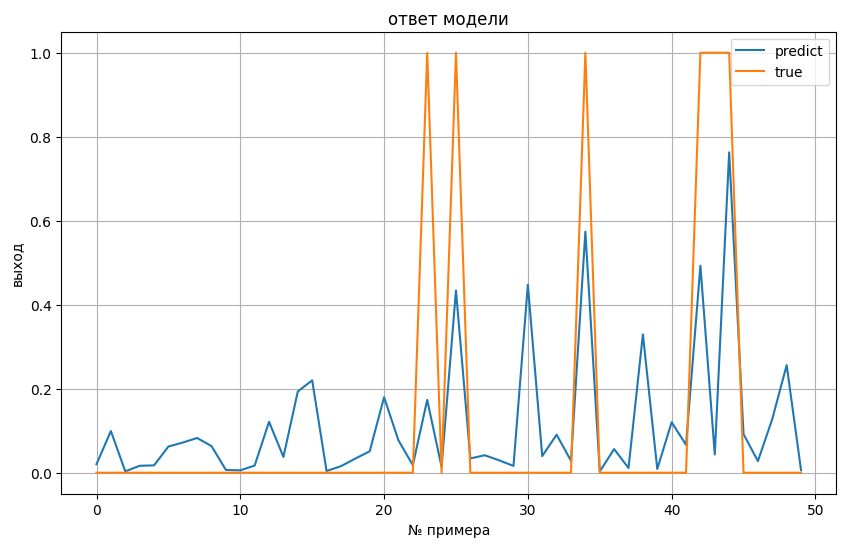

In [ ]:
n = 50
plt.figure(figsize=(10, 6))
plt.plot(preds[:n], label='predict')
plt.plot(y_test.values[:n], label='true')
plt.title('ответ модели')
plt.xlabel('№ примера')
plt.ylabel('выход')
plt.legend()
plt.grid('On')
plt.show()

### Функция - медиана.

In [ ]:
function = np.median

In [ ]:
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding(x, doc_dict, function))])
user_embeddings.columns = [f'topic_{i}' for i in range(N_topic)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+[f'topic_{i}' for i in range(N_topic)]]
user_embeddings.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
0,u105138,0.104487,0.0,0.000000,0.063440,0.005804,0.0,0.038803,0.165864,0.0,0.000000,0.085018,0.000000,0.010306,0.153476,0.0
1,u108690,0.222824,0.0,0.042997,0.139910,0.017871,0.0,0.022921,0.056818,0.0,0.015508,0.056289,0.023151,0.000000,0.157588,0.0
2,u108339,0.093444,0.0,0.000000,0.149719,0.000000,0.0,0.091681,0.070730,0.0,0.031826,0.236577,0.047716,0.017261,0.110979,0.0


In [ ]:
X = pd.merge(user_embeddings, target, 'left')
X.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,churn
0,u105138,0.104487,0.0,0.000000,0.063440,0.005804,0.0,0.038803,0.165864,0.0,0.000000,0.085018,0.000000,0.010306,0.153476,0.0,0
1,u108690,0.222824,0.0,0.042997,0.139910,0.017871,0.0,0.022921,0.056818,0.0,0.015508,0.056289,0.023151,0.000000,0.157588,0.0,1
2,u108339,0.093444,0.0,0.000000,0.149719,0.000000,0.0,0.091681,0.070730,0.0,0.031826,0.236577,0.047716,0.017261,0.110979,0.0,1


In [ ]:
# разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X[[f'topic_{i}' for i in range(N_topic)]],
                                                    X['churn'], random_state=0, stratify=X['churn'],
                                                    test_size=0.25)

In [ ]:
model = LogisticRegression()
# обучим
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# наши прогнозы для тестовой выборки
preds = model.predict_proba(X_test)[:, 1]
preds[:10]

array([0.03052879, 0.08142335, 0.00796962, 0.01287564, 0.02229285,
       0.04570797, 0.01956498, 0.15109454, 0.05926123, 0.00297321])

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')

Best Threshold=0.2556147381356152, F-Score=0.698, Precision=0.614, Recall=0.808


In [ ]:
roc_auc = roc_auc_score(y_test, preds)
roc_auc

0.9522971428571428

In [ ]:
metrics_df = metrics_df.append({
    'model': function.__name__,
    'thresh': thresholds[ix],
    'F-Score': fscore[ix],
    'Precision': precision[ix],
    'Recall': recall[ix],
    'ROC AUC': roc_auc
}, ignore_index=True)

metrics_df

<ipython-input-49-51e644a07e4d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


,model,thresh,F-Score,Precision,Recall,ROC AUC
0,mean,0.298450,0.704280,0.685606,0.724,0.950267
1,median,0.255615,0.697755,0.613982,0.808,0.952297


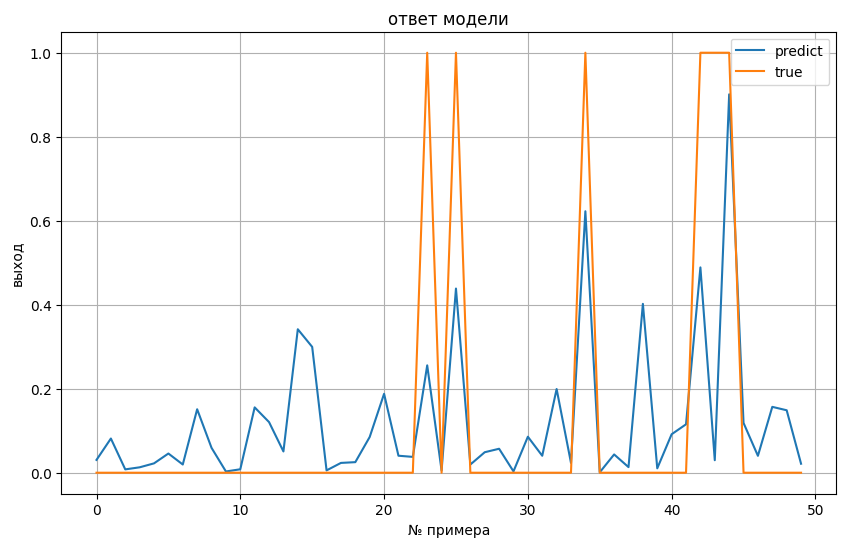

In [ ]:
n = 50
plt.figure(figsize=(10, 6))
plt.plot(preds[:n], label='predict')
plt.plot(y_test.values[:n], label='true')
plt.title('ответ модели')
plt.xlabel('№ примера')
plt.ylabel('выход')
plt.legend()
plt.grid('On')
plt.show()

### Функция - максимум.

In [ ]:
function = np.max

In [ ]:
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding(x, doc_dict, function))])
user_embeddings.columns = [f'topic_{i}' for i in range(N_topic)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+[f'topic_{i}' for i in range(N_topic)]]
user_embeddings.head()

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
0,u105138,0.337677,0.063002,0.052531,0.286050,0.162405,0.0,0.263800,0.399181,0.000000,0.140490,0.285408,0.347533,0.077048,0.465459,0.000000
1,u108690,0.359591,0.014443,0.381993,0.215219,0.049680,0.0,0.179711,0.102828,0.000000,0.171411,0.392106,0.196551,0.015329,0.308417,0.014231
2,u108339,0.241098,0.141887,0.127143,0.226010,0.146716,0.0,0.218952,0.157196,0.000000,0.126990,0.314794,0.238031,0.070426,0.222683,0.015497
3,u101138,0.135729,0.011070,0.511607,0.119517,0.102943,0.0,0.374583,0.046297,0.000000,0.015680,0.122314,0.070716,0.033541,0.411472,0.623984
4,u108248,0.638955,0.000000,0.125553,0.192934,0.050760,0.0,0.288141,0.079114,0.012459,0.015192,0.196165,0.544163,0.010348,0.337822,0.025746


In [ ]:
X = pd.merge(user_embeddings, target, 'left')
X.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,churn
0,u105138,0.337677,0.063002,0.052531,0.286050,0.162405,0.0,0.263800,0.399181,0.0,0.140490,0.285408,0.347533,0.077048,0.465459,0.000000,0
1,u108690,0.359591,0.014443,0.381993,0.215219,0.049680,0.0,0.179711,0.102828,0.0,0.171411,0.392106,0.196551,0.015329,0.308417,0.014231,1
2,u108339,0.241098,0.141887,0.127143,0.226010,0.146716,0.0,0.218952,0.157196,0.0,0.126990,0.314794,0.238031,0.070426,0.222683,0.015497,1


In [ ]:
# разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X[[f'topic_{i}' for i in range(N_topic)]],
                                                    X['churn'], random_state=0, stratify=X['churn'],
                                                    test_size=0.25)

In [ ]:
model = LogisticRegression()
# обучим
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# наши прогнозы для тестовой выборки
preds = model.predict_proba(X_test)[:, 1]
preds[:10]

array([0.00695524, 0.0200222 , 0.00048764, 0.04569089, 0.00950916,
       0.24559629, 0.05475271, 0.04464957, 0.22898264, 0.00515673])

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')

Best Threshold=0.3587670734564629, F-Score=0.728, Precision=0.728, Recall=0.728


In [ ]:
roc_auc = roc_auc_score(y_test, preds)
roc_auc

0.9543085714285714

In [ ]:
metrics_df = metrics_df.append({
    'model': function.__name__,
    'thresh': thresholds[ix],
    'F-Score': fscore[ix],
    'Precision': precision[ix],
    'Recall': recall[ix],
    'ROC AUC': roc_auc
}, ignore_index=True)

metrics_df

<ipython-input-60-51e644a07e4d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


,model,thresh,F-Score,Precision,Recall,ROC AUC
0,mean,0.298450,0.704280,0.685606,0.724,0.950267
1,median,0.255615,0.697755,0.613982,0.808,0.952297
2,amax,0.358767,0.728000,0.728000,0.728,0.954309


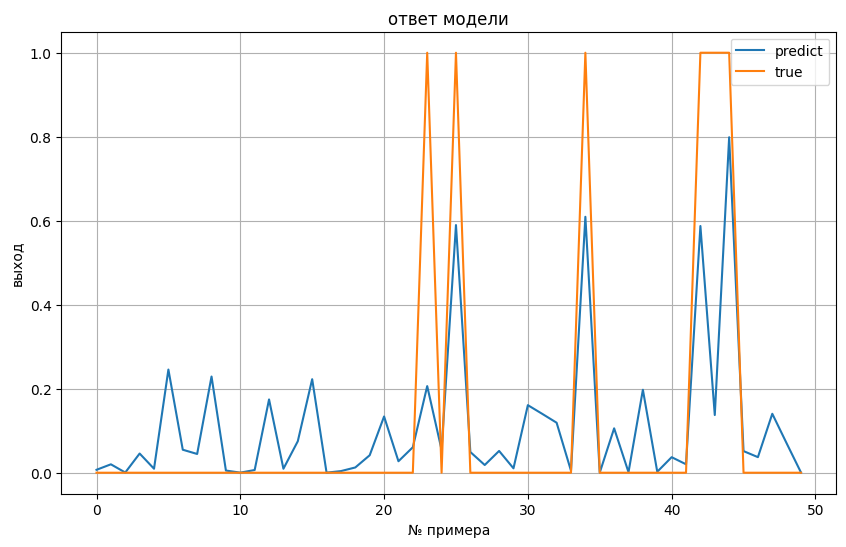

In [ ]:
n = 50
plt.figure(figsize=(10, 6))
plt.plot(preds[:n], label='predict')
plt.plot(y_test.values[:n], label='true')
plt.title('ответ модели')
plt.xlabel('№ примера')
plt.ylabel('выход')
plt.legend()
plt.grid('On')
plt.show()

### Tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
users['articles_str'] = users['articles'].apply(lambda x: x.replace('[','').replace(']', '').replace(',', ''))

In [ ]:
tfidf = TfidfVectorizer()
tfidf.fit(users['articles_str'])

TfidfVectorizer()

In [ ]:
idf = pd.DataFrame({'article_id': tfidf.get_feature_names_out(),
                    'idf': tfidf.idf_})

idf.head()

,article_id,idf
0,10,8.888710
1,100,7.907880
2,1000,8.041412
3,1001,8.888710
4,1002,8.888710


In [ ]:
def get_user_embedding_idf(user_articles_list, doc_dict):
    user_articles_list = eval(user_articles_list)

    user_vector = np.zeros((len(user_articles_list), N_topic))
    for i, doc_id in enumerate(user_articles_list):
        try:
            weight = idf[idf['article_id'] == str(doc_id)]['idf'].values[0]
        except Exception as e:
            weight = 0
        user_vector[i] = doc_dict[doc_id] * weight

    user_vector = np.median(user_vector, axis=0)
    return user_vector

In [ ]:
from tqdm import tqdm
tqdm.pandas()

user_embeddings = pd.DataFrame([i for i in users['articles'].progress_apply(lambda x: get_user_embedding_idf(x, doc_dict))])
user_embeddings.columns = [f'topic_{i}' for i in range(N_topic)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+[f'topic_{i}' for i in range(N_topic)]]
user_embeddings.head()

100%|██████████| 8000/8000 [01:01<00:00, 129.66it/s]


,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
0,u105138,0.877254,0.0,0.000000,0.534003,0.049924,0.0,0.333747,1.426602,0.0,0.000000,0.696772,0.000000,0.093573,1.294764,0.000000
1,u108690,1.881402,0.0,0.356014,1.163995,0.146466,0.0,0.203752,0.480976,0.0,0.135097,0.452419,0.204114,0.000000,1.398102,0.000000
2,u108339,0.758723,0.0,0.000000,1.268689,0.000000,0.0,0.742213,0.571203,0.0,0.286955,2.068428,0.416950,0.134464,0.884545,0.000000
3,u101138,0.255961,0.0,0.791702,0.116273,0.370317,0.0,0.759888,0.000000,0.0,0.000000,0.000000,0.090880,0.000000,1.099918,2.669819
4,u108248,1.647435,0.0,0.450938,0.565411,0.173976,0.0,0.666678,0.293623,0.0,0.000000,0.181523,0.205045,0.000000,1.963925,0.000000


In [ ]:
X = pd.merge(user_embeddings, target, 'left')
X.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,churn
0,u105138,0.877254,0.0,0.000000,0.534003,0.049924,0.0,0.333747,1.426602,0.0,0.000000,0.696772,0.000000,0.093573,1.294764,0.0,0
1,u108690,1.881402,0.0,0.356014,1.163995,0.146466,0.0,0.203752,0.480976,0.0,0.135097,0.452419,0.204114,0.000000,1.398102,0.0,1
2,u108339,0.758723,0.0,0.000000,1.268689,0.000000,0.0,0.742213,0.571203,0.0,0.286955,2.068428,0.416950,0.134464,0.884545,0.0,1


In [ ]:
# разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X[[f'topic_{i}' for i in range(N_topic)]],
                                                    X['churn'], random_state=0, stratify=X['churn'],
                                                    test_size=0.25)

In [ ]:
model = LogisticRegression()
# обучим
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# наши прогнозы для тестовой выборки
preds = model.predict_proba(X_test)[:, 1]
preds[:10]

array([1.50075507e-05, 4.02727654e-02, 4.08152904e-08, 3.46939662e-03,
       8.11888127e-03, 1.67759871e-03, 7.29891205e-04, 2.05314768e-02,
       3.89447106e-03, 1.37082267e-09])

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')

Best Threshold=0.41329236200347647, F-Score=0.786, Precision=0.772, Recall=0.800


In [ ]:
roc_auc = roc_auc_score(y_test, preds)
roc_auc

0.974816

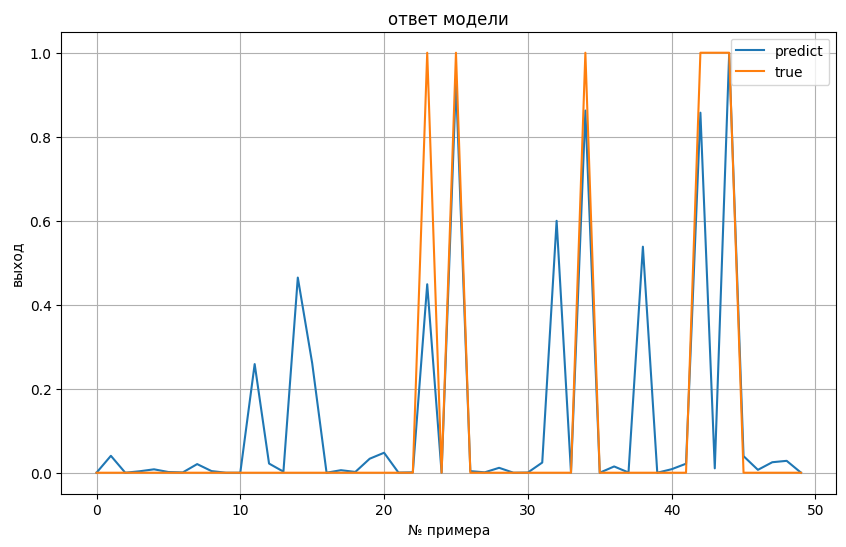

In [ ]:
n = 50
plt.figure(figsize=(10, 6))
plt.plot(preds[:n], label='predict')
plt.plot(y_test.values[:n], label='true')
plt.title('ответ модели')
plt.xlabel('№ примера')
plt.ylabel('выход')
plt.legend()
plt.grid('On')
plt.show()

In [ ]:
metrics_df = metrics_df.append({
    'model': 'idf_median',
    'thresh': thresholds[ix],
    'F-Score': fscore[ix],
    'Precision': precision[ix],
    'Recall': recall[ix],
    'ROC AUC': roc_auc
}, ignore_index=True)

<ipython-input-74-18b95ddf6d03>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


In [ ]:
metrics_df

,model,thresh,F-Score,Precision,Recall,ROC AUC
0,mean,0.298450,0.704280,0.685606,0.724,0.950267
1,median,0.255615,0.697755,0.613982,0.808,0.952297
2,amax,0.358767,0.728000,0.728000,0.728,0.954309
3,idf_median,0.413292,0.785855,0.772201,0.800,0.974816


#### Способ со взвешиванием новостей по tfidf оказался эффективнее остальных, т.к. учитывалась информативность документов.